# Startup Success Analysis 

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Get absolute path
abspath = '/content/drive/My Drive/Colab Notebooks/Startup/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Data Importation and Preliminary Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import plotly.express as px 
import plotly.figure_factory as ff
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn import decomposition
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

import statsmodels.api as sm
from sklearn.metrics import classification_report
%matplotlib inline
init_notebook_mode(connected=True)

import graphviz 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath)
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
# Import the initial dataset using the Pandas library
df = pd.read_csv(directory + '/startup2.csv', 
                 names = ["Name", "Status", "Year", 'Age', "IntAct", "Description", "Industry", 
                          "Focus", "Investors", "EmployeeC", "TeamSize", "FoundingAmount", "Country", 
                          "Continent", "NInvesterSeed", "NInvestersAngel", "NCofounders", "NAdvisors", "TeamSizeS",
                          "TeamSizeA", "Fund", "NReInversts", "NSalesS", "WT", "SP", "WS", "WSS", "Big5", "ECon", 
                          "Product", "PublicD", "ConsumerD", "StructuredD", "Sub", "Cloud", "Local", "Linear", 
                          "Capital", "NPartners", "CrowdS", "CrowdF", "Machine", "Predictive", "Speech", "Presc",
                          "BigD", "Cross", "Owns", "Aggre", "Online", "B2C", "Forum", "AveY", "Expo", "Breadth", 
                          "Ed", "YEd", "Spe", "RelEd", "RelEx", "DeTier", "Renowned", "ExS", "Ex100", "Ex500", 
                          "Ex1000", "Top", "Rec", "Res", "Skills", "Team", "Dif", "Pricing", "Localisation", "Time",
                          "Employee", "Long", "Patent", "Barriers", "Awards", "History", "Legal", "Client", "Google",
                          "Technical", "Solutions", "Global", "Trend", "Disrupt", "Competition", "EmployeeY", "Round",
                          "Survival", "Time1", "AvgT", "Gartner", "TimeM", "Entre", "Ope", "Eng", "Mark", "Lead", 
                          "DS", "BS", "PM", "Sales", "Domain", "Law", "Con", "Fin", "Inv", "RenownS"],
                skiprows = [0],
                index_col = "Name")

## 6. Predict the Startup Success

In [ ]:
# Create the dataframe used for logistic regression analysis
# Predictors include the skills of the entrepreneurs
# Outcome variable is the status of the startups (Succeed vs. Failed)
skill_df = df[['Status', 'Entre', 'Ope', 'Eng', 'Mark', 'Lead', 'DS', 'BS', 'PM',
       'Sales', 'Domain', 'Law', 'Con', 'Fin', 'Inv']]
cols_to_transform2 = ["Status"]
train = pd.get_dummies(skill_df, columns = cols_to_transform2 )
train = train.dropna()
train = train.drop(columns=['Status_Failed'])

# Seperate the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(train.drop('Status_Success',axis=1), 
                                                    train['Status_Success'], test_size=0.30, 
                                                    random_state=101)

 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
feature_list = list(train.iloc[:,0:-1].columns)
feature_list

['Entre',
 'Ope',
 'Eng',
 'Mark',
 'Lead',
 'DS',
 'BS',
 'PM',
 'Sales',
 'Domain',
 'Law',
 'Con',
 'Fin',
 'Inv']

In [ ]:
target_list = ['0', '1']
target_list

['0', '1']

### 6.1 Logistic Regression

Training the Algorithm

In [ ]:
# Fit the logistic regression model using the training dataset
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Test the accuracy of the model using the testing dataset
predictions_log = logmodel.predict(X_test)

print(classification_report(y_test,predictions_log))
print("Accuracy:",metrics.accuracy_score(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.29      0.06      0.10        33
           1       0.74      0.95      0.83        91

    accuracy                           0.71       124
   macro avg       0.51      0.50      0.46       124
weighted avg       0.62      0.71      0.63       124

Accuracy: 0.7096774193548387


### 6.2 Regression Tree

In [ ]:
clf = DecisionTreeClassifier() 
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Tree in textual format

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree, feature_names=feature_list)
print(r)

|--- DS <= -0.05
|   |--- Entre <= 0.70
|   |   |--- BS <= 0.84
|   |   |   |--- class: 1
|   |   |--- BS >  0.84
|   |   |   |--- class: 0
|   |--- Entre >  0.70
|   |   |--- Sales <= 3.81
|   |   |   |--- class: 1
|   |   |--- Sales >  3.81
|   |   |   |--- class: 0
|--- DS >  -0.05
|   |--- Entre <= 2.48
|   |   |--- PM <= 3.02
|   |   |   |--- class: 1
|   |   |--- PM >  3.02
|   |   |   |--- class: 0
|   |--- Entre >  2.48
|   |   |--- class: 0



#### Plot the tree

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Startup", view=True) 

'Startup.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                       feature_names=feature_list,  
                       class_names=target_list,  
                       filled=True, rounded=True,  
                       special_characters=True)  


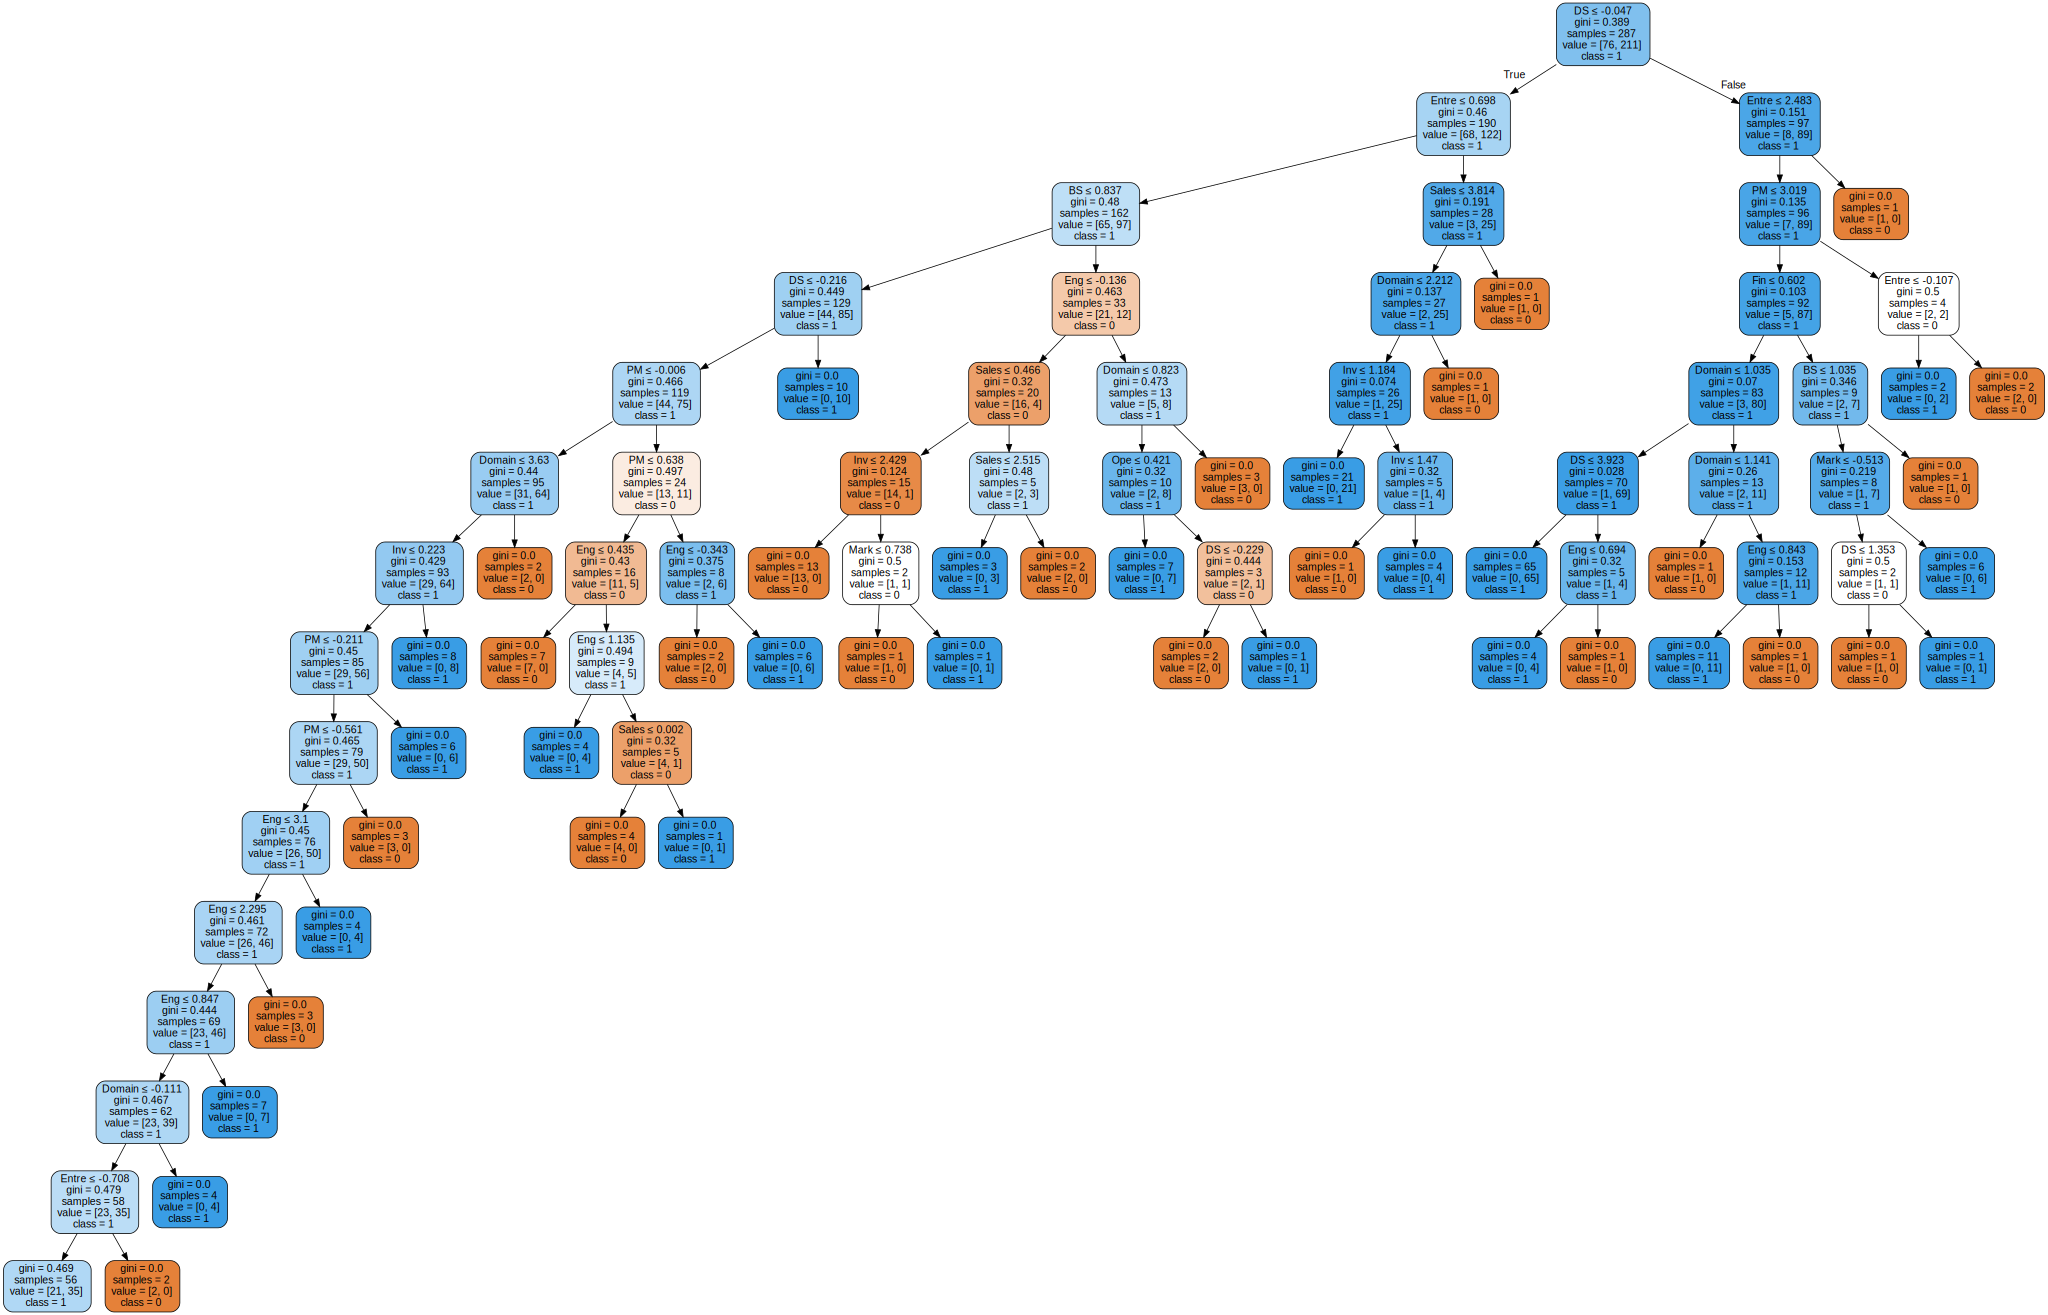

In [ ]:
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7016129032258065


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7096774193548387


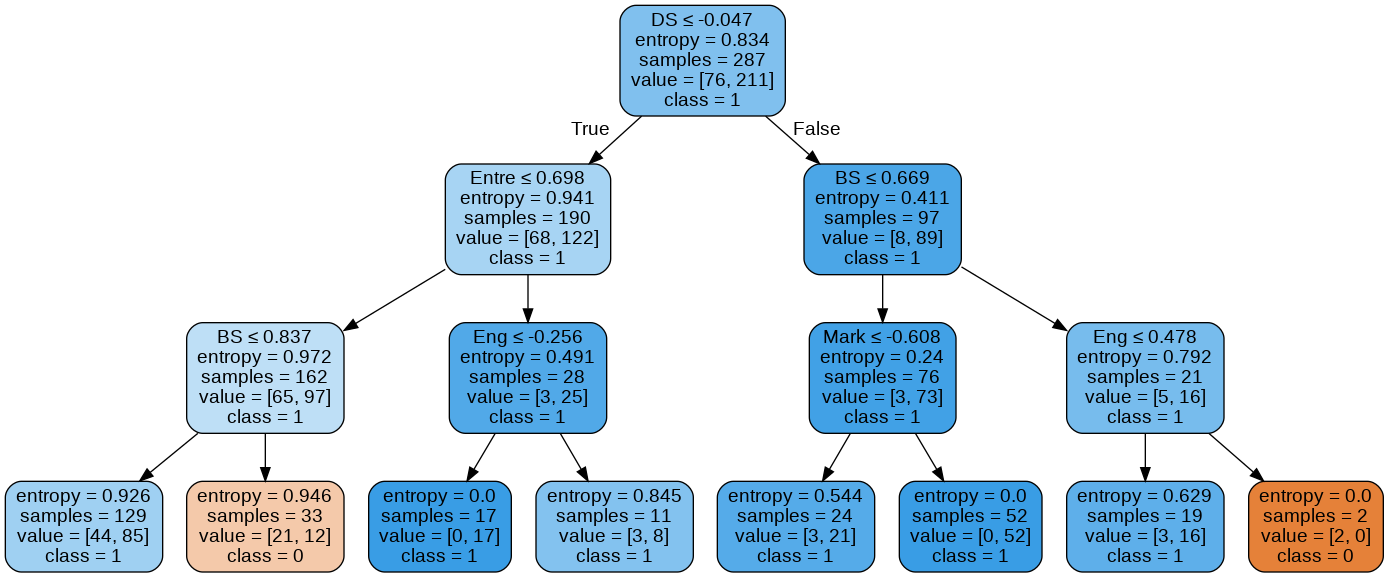

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_list,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### 6.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, oob_score = True)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions_rf - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.34 degrees.


In [ ]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.040)


The accuracy rate (74.1%) of the logistic model is relatively high, meaning that the skills of entrepreneurs are good indicators of the probability of success or failure of their startups.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_rf.round())
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.0707
Mean accuracy score: 0.726


In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
test_score = r2_score(y_test, predictions_rf)
spearman = spearmanr(y_test, predictions_rf)
pearson = pearsonr(y_test, predictions_rf)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.0707
Test data R-2 score: 0.0123
Test data Spearman correlation: 0.236
Test data Pearson correlation: 0.234


In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, predictions_rf.round()),
    columns=['Predicted Success', 'Predicted Failure'],
    index=['True Success', 'True Failure']
)

,Predicted Success,Predicted Failure
True Success,7,26
True Failure,8,83


#### Plot one tree from the forest

In [ ]:
estimator = rf.estimators_[5]
estimator

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1201263687, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree_limited.dot', 
                feature_names = feature_list,
                class_names = target_list,
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
# !dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

2

In [ ]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

FileNotFoundError: ignored

#### Get feature importance

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
train_important = X_train[['DS', 'PM']]

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = ['DS', 'PM']
train_important = X_train[['DS', 'PM']]
test_important = X_test[['DS', 'PM']]


In [ ]:
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - np.mean(mape[np.isfinite(mape)])
print('Accuracy:', round(accuracy, 2), '%.')